In [221]:
# Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import collections, re
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [222]:
# Import description dataset
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv", sep = ',')

# First view of the description dataset

In [223]:
# First view of dataset
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf415

In [224]:
# Code to display all columns and all texts
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 20
    display.max_rows = 100
    display.max_colwidth = 300
    display.width = None
set_pandas_display_options()

In [225]:
# First view of dataset
data.head(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf415

In [226]:
data.head(50)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf415

In [227]:
# Size of dataset
data.shape

(1050, 15)

In [228]:
# dtypes of features
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [229]:
# Percentage of missing values for each column
data.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [230]:
# Number of missing values for each column
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [231]:
# Duplicates ?
print("duplicates in data : ", data.duplicated().sum())
print("duplicates in data['uniq_id'] : ", data.duplicated('uniq_id').sum())
print("duplicates in data['product_url'] : ", data.duplicated('product_url').sum())
print("duplicates in data['product_name'] : ", data.duplicated('product_name').sum())
print("duplicates in data['image'] : ", data.duplicated('image').sum())
print("duplicates in data['pid'] : ", data.duplicated('pid').sum())
print("duplicates in data['description'] : ", data.duplicated('description').sum())

duplicates in data :  0
duplicates in data['uniq_id'] :  0
duplicates in data['product_url'] :  0
duplicates in data['product_name'] :  0
duplicates in data['image'] :  0
duplicates in data['pid'] :  0
duplicates in data['description'] :  0


In [232]:
# Analysis of numeric features #1 : 'retail_price' & 'discounted_price'
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


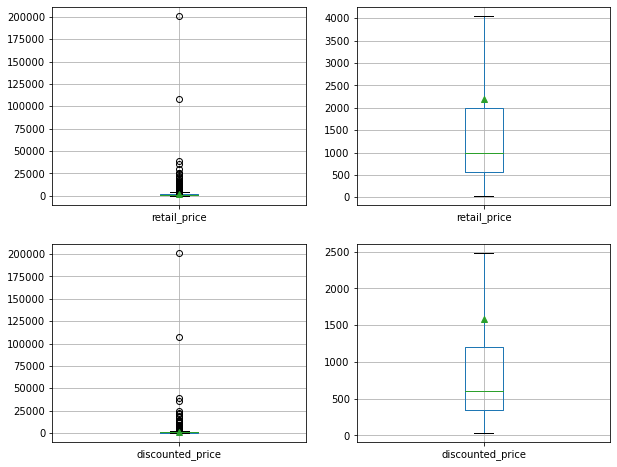

In [233]:
# Analysis of numeric features #2 : 'retail_price' & 'discounted_price'
# Boxplots with or without outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

data.boxplot(column=["retail_price"], ax=axes[0, 0], showfliers=True, showmeans=True)
data.boxplot(column=["retail_price"], ax=axes[0, 1], showfliers=False, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 0], showfliers=True, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 1], showfliers=False, showmeans=True)

plt.show()

In [234]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [235]:
# Analysis of different features

# Number of different product_category_tree
print('number of different product_category_tree =', 
      len(data['product_category_tree'].unique().tolist()))
print('-------------------------------------------')

# Number of different product_rating
print('number of different product_rating =', 
      len(data['product_rating'].unique().tolist()))
print('-------------------------------------------')
      
# Number of different overall_rating
print('number of different overall_rating =', 
      len(data['overall_rating'].unique().tolist()))
print('-------------------------------------------')

# Number of different brand
print('number of different brand =', 
      len(data['brand'].unique().tolist()))

number of different product_category_tree = 642
-------------------------------------------
number of different product_rating = 27
-------------------------------------------
number of different overall_rating = 27
-------------------------------------------
number of different brand = 491


In [236]:
# Number of products by product_rating 
data['product_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '4.5': 10,
 '1': 10,
 '4.3': 9,
 '3.5': 8,
 '3.7': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '4.7': 3,
 '3.8': 3,
 '2.3': 3,
 '3.6': 3,
 '4.4': 3,
 '4.8': 2,
 '2.2': 1,
 '3.1': 1,
 '3.2': 1,
 '1.5': 1,
 '4.9': 1,
 '2.5': 1,
 '2.7': 1,
 '3.3': 1,
 '3.9': 1}

In [237]:
# Number of products by overall_rating  
data['overall_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '4.5': 10,
 '1': 10,
 '4.3': 9,
 '3.5': 8,
 '3.7': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '4.7': 3,
 '3.8': 3,
 '2.3': 3,
 '3.6': 3,
 '4.4': 3,
 '4.8': 2,
 '2.2': 1,
 '3.1': 1,
 '3.2': 1,
 '1.5': 1,
 '4.9': 1,
 '2.5': 1,
 '2.7': 1,
 '3.3': 1,
 '3.9': 1}

-> 'product_rating' and 'overall_rating' are the same feature

In [238]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [239]:
# Filter convenient features
data = data[['uniq_id',
            'product_name',
            'product_category_tree',
            'image',
            'description']]

In [240]:
data.head()

,uniq_id,product_name,product_category_tree,image,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text..."
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",d4684dcdc759dd9cdf41504698d737d8.jpg,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washa..."
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]",6325b6870c54cd47be6ebfbffa620ec7.jpg,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet..."


## Analysis of categories and creation of new categories

In [241]:
# Display all product_category_trees
list_cat_trees = data['product_category_tree'].unique().tolist()
list_cat_trees

['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
 '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
 '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
 '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
 '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
 '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]',
 '["Watches >> Wrist Watches >> C

In [242]:
# Display number of different product_category_trees
len(list_cat_trees)

642

In [243]:
# Create 'first_category', 'second_category' and 'third_category' features from 'product_category_tree'
import re

# Save column index of 'product_category_tree'
index_product_category_tree = data.columns.get_loc('product_category_tree')
# Create new columns
data['first_category'] = 0
data['second_category'] = 0
data['third_category'] = 0
# Save column indexes of 'first_category', 'second_category' and 'third_category'
index_first_category = data.columns.get_loc('first_category')
index_second_category = data.columns.get_loc('second_category')
index_third_category = data.columns.get_loc('third_category')

# Add the appropriate category for each dataset row
for index in data.index:
    # Save string for each index of column 'product_category_tree'
    cat_tree = data.iloc[index, index_product_category_tree]
    # Save indexes of each ">" for each dataset row in list 'indices'
    indices = [i.start() for i in re.finditer(">", cat_tree)]
    # column 'first_categoy' : Keep only first_category (string before the first '>')
    first_cat = cat_tree[2:indices[0] - 1]
    data.iloc[index, index_first_category] = first_cat
    # column 'second_category : Keep only second_category 
    # (string before the third '>' or complete string if len(indices) == 2)
    if len(indices) == 2:
        data.iloc[index, index_second_category] = cat_tree[2:-2]
    else:
        second_cat = cat_tree[2:indices[2] - 1]
        data.iloc[index, index_second_category] = second_cat
    # column 'third_category : Keep third_category or second_category if there is no third_category
    # (string before the fifth '>' or complete string if len(indices) == 4 or 2)
    if 2 <= len(indices) <= 4:
        data.iloc[index, index_third_category] = cat_tree[2:-2]
    else:
        third_cat = cat_tree[2:indices[4] - 1]
        data.iloc[index, index_third_category] = third_cat

In [244]:
# Display the list of first_category listed in alphabetical order
list_1st_cat = data['first_category'].unique().tolist()
list_1st_cat.sort()
print(list_1st_cat)
print('number of first categories =', len(list_1st_cat))

['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches']
number of first categories = 7


In [245]:
list_1st_cat

['Baby Care',
 'Beauty and Personal Care',
 'Computers',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Watches']

In [246]:
# Number of products by first_category
data.groupby('first_category')['first_category'].count()

first_category
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: first_category, dtype: int64

In [247]:
# Display the list of second_category listed in alphabetical order
list_2nd_cat = data['second_category'].unique().tolist()
list_2nd_cat.sort()
print(list_2nd_cat)
print('number of second categories =', len(list_2nd_cat))

['Baby Care >> Baby & Kids Gifts', 'Baby Care >> Baby Bath & Skin', 'Baby Care >> Baby Bedding', 'Baby Care >> Baby Grooming', 'Baby Care >> Diapering & Potty Training', 'Baby Care >> Feeding & Nursing', 'Baby Care >> Furniture & Furnishings', 'Baby Care >> Infant Wear', 'Baby Care >> Strollers & Activity Gear', 'Beauty and Personal Care >> Bath and Spa', 'Beauty and Personal Care >> Beauty Accessories', 'Beauty and Personal Care >> Body and Skin Care', 'Beauty and Personal Care >> Combos and Kits', 'Beauty and Personal Care >> Eye Care', 'Beauty and Personal Care >> Fragrances', 'Beauty and Personal Care >> Hair Care', 'Beauty and Personal Care >> Health Care', 'Beauty and Personal Care >> Makeup', "Beauty and Personal Care >> Men's Grooming", "Beauty and Personal Care >> Women's Hygiene", 'Computers >> Computer Components', 'Computers >> Computer Peripherals', 'Computers >> Laptop Accessories', 'Computers >> Laptops', 'Computers >> Network Components', 'Computers >> Software', 'Compu

In [248]:
list_2nd_cat

['Baby Care >> Baby & Kids Gifts',
 'Baby Care >> Baby Bath & Skin',
 'Baby Care >> Baby Bedding',
 'Baby Care >> Baby Grooming',
 'Baby Care >> Diapering & Potty Training',
 'Baby Care >> Feeding & Nursing',
 'Baby Care >> Furniture & Furnishings',
 'Baby Care >> Infant Wear',
 'Baby Care >> Strollers & Activity Gear',
 'Beauty and Personal Care >> Bath and Spa',
 'Beauty and Personal Care >> Beauty Accessories',
 'Beauty and Personal Care >> Body and Skin Care',
 'Beauty and Personal Care >> Combos and Kits',
 'Beauty and Personal Care >> Eye Care',
 'Beauty and Personal Care >> Fragrances',
 'Beauty and Personal Care >> Hair Care',
 'Beauty and Personal Care >> Health Care',
 'Beauty and Personal Care >> Makeup',
 "Beauty and Personal Care >> Men's Grooming",
 "Beauty and Personal Care >> Women's Hygiene",
 'Computers >> Computer Components',
 'Computers >> Computer Peripherals',
 'Computers >> Laptop Accessories',
 'Computers >> Laptops',
 'Computers >> Network Components',
 'Compu

In [249]:
# Number of products by second_category
data.groupby('second_category')['second_category'].count()

second_category
Baby Care >> Baby & Kids Gifts                                    15
Baby Care >> Baby Bath & Skin                                     14
Baby Care >> Baby Bedding                                         15
Baby Care >> Baby Grooming                                         4
Baby Care >> Diapering & Potty Training                            7
Baby Care >> Feeding & Nursing                                     8
Baby Care >> Furniture & Furnishings                               2
Baby Care >> Infant Wear                                          84
Baby Care >> Strollers & Activity Gear                             1
Beauty and Personal Care >> Bath and Spa                           7
Beauty and Personal Care >> Beauty Accessories                     1
Beauty and Personal Care >> Body and Skin Care                    15
Beauty and Personal Care >> Combos and Kits                       24
Beauty and Personal Care >> Eye Care                               2
Beauty and Persona

In [250]:
# Display the list of third_category listed in alphabetical order
list_3rd_cat = data['third_category'].unique().tolist()
list_3rd_cat.sort()
print(list_3rd_cat)
print('number of third categories =', len(list_3rd_cat))

['Baby Care >> Baby & Kids Gifts >> Decorations', 'Baby Care >> Baby & Kids Gifts >> Photo Frames', 'Baby Care >> Baby & Kids Gifts >> Stickers', 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels', 'Baby Care >> Baby Bath & Skin >> Baby Body Wash', 'Baby Care >> Baby Bath & Skin >> Baby Shower Caps', 'Baby Care >> Baby Bedding >> Baby Bedsheets', 'Baby Care >> Baby Bedding >> Baby Blankets', 'Baby Care >> Baby Bedding >> Baby Mattresses', 'Baby Care >> Baby Bedding >> Baby Mosquito Nets', 'Baby Care >> Baby Bedding >> Baby Sleeping Bags', 'Baby Care >> Baby Grooming >> Baby Grooming Combos', 'Baby Care >> Baby Grooming >> Baby Massage Oils', 'Baby Care >> Baby Grooming >> Boreal Baby Grooming', 'Baby Care >> Baby Grooming >> Cotton Buds', 'Baby Care >> Diapering & Potty Training >> Changing Tables', 'Baby Care >> Diapering & Potty Training >> Diaper Bags', 'Baby Care >> Diapering & Potty Training >> Nappies & Cloth Diapers', 'Baby Care >> Feeding & Nursing >> Bibs & Hankies', 'Baby Ca

In [251]:
list_3rd_cat

['Baby Care >> Baby & Kids Gifts >> Decorations',
 'Baby Care >> Baby & Kids Gifts >> Photo Frames',
 'Baby Care >> Baby & Kids Gifts >> Stickers',
 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels',
 'Baby Care >> Baby Bath & Skin >> Baby Body Wash',
 'Baby Care >> Baby Bath & Skin >> Baby Shower Caps',
 'Baby Care >> Baby Bedding >> Baby Bedsheets',
 'Baby Care >> Baby Bedding >> Baby Blankets',
 'Baby Care >> Baby Bedding >> Baby Mattresses',
 'Baby Care >> Baby Bedding >> Baby Mosquito Nets',
 'Baby Care >> Baby Bedding >> Baby Sleeping Bags',
 'Baby Care >> Baby Grooming >> Baby Grooming Combos',
 'Baby Care >> Baby Grooming >> Baby Massage Oils',
 'Baby Care >> Baby Grooming >> Boreal Baby Grooming',
 'Baby Care >> Baby Grooming >> Cotton Buds',
 'Baby Care >> Diapering & Potty Training >> Changing Tables',
 'Baby Care >> Diapering & Potty Training >> Diaper Bags',
 'Baby Care >> Diapering & Potty Training >> Nappies & Cloth Diapers',
 'Baby Care >> Feeding & Nursing >> Bibs & 

In [252]:
# Number of products by third_category
data.groupby('third_category')['third_category'].count()

third_category
Baby Care >> Baby & Kids Gifts >> Decorations               1
Baby Care >> Baby & Kids Gifts >> Photo Frames              4
Baby Care >> Baby & Kids Gifts >> Stickers                 10
Baby Care >> Baby Bath & Skin >> Baby Bath Towels          11
Baby Care >> Baby Bath & Skin >> Baby Body Wash             2
                                                           ..
Watches >> Wrist Watches >> Vizion Wrist Watches            1
Watches >> Wrist Watches >> Xemex Wrist Watches             1
Watches >> Wrist Watches >> Yves Bertelin Wrist Watches     1
Watches >> Wrist Watches >> fastrack Wrist Watches          1
Watches >> Wrist Watches >> palito Wrist Watches            3
Name: third_category, Length: 243, dtype: int64

In [253]:
data

,uniq_id,product_name,product_category_tree,image,description,first_category,second_category,third_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",Home Furnishing,Home Furnishing >> Curtains & Accessories,Home Furnishing >> Curtains & Accessories >> Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",d4684dcdc759dd9cdf41504698d737d8.jpg,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washa...",Home Furnishing,Home Furnishing >> Bed Linen,Home Furnishing >> Bed Linen >> Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]",6325b6870c54cd47be6ebfbffa620ec7.jpg,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet...",Home Furnishing,Home Furnishing >> Bed Linen,Home Furnishing >> Bed Linen >> Bedsheets
...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This will d�cor the wall like 3d look. Tree with the gr...,Baby Care,Baby Care >> Baby & Kids Gifts,Baby Care >> Baby & Kids Gifts >> Stickers
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra La

# Bag-of-words

In [254]:
# Count words in column 'description' without any cleaning
data['description'] = data['description'].astype(str)
import collections, re
pd.Series([y for x in data['description'].values.flatten() for y in x.split()]).value_counts().to_dict()

{'of': 1656,
 'and': 1167,
 'the': 1013,
 'to': 982,
 '-': 910,
 'for': 819,
 'in': 748,
 'Only': 717,
 'at': 701,
 'with': 688,
 'your': 600,
 'Rs.': 584,
 'For': 584,
 'Buy': 566,
 'Genuine': 564,
 'a': 555,
 'is': 544,
 'Replacement': 518,
 '&': 492,
 '30': 486,
 'cm': 473,
 'Day': 473,
 'On': 425,
 'Products.': 413,
 'Free': 403,
 'on': 402,
 'Shipping.': 381,
 'Cash': 381,
 'Delivery!': 381,
 'Flipkart.com.': 379,
 '1': 365,
 'from': 352,
 'Price:': 342,
 'The': 338,
 'Features': 327,
 'Guarantee.': 318,
 'Watch': 292,
 'In': 287,
 'Baby': 287,
 'General': 285,
 'Type': 281,
 'Package': 268,
 'Box': 265,
 'Sales': 261,
 'you': 257,
 'this': 254,
 'Analog': 253,
 'Number': 244,
 'Pack': 243,
 'Set': 237,
 'Cotton': 218,
 'Warranty': 217,
 'Key': 215,
 'Model': 215,
 'best': 213,
 'Material': 212,
 'It': 207,
 'Color': 206,
 'Brand': 204,
 'Showpiece': 198,
 'it': 198,
 'are': 191,
 'Details': 188,
 'be': 188,
 'online.': 183,
 'cash': 183,
 'delivery.': 183,
 'Ceramic': 183,
 'ship

## Cleaning of the text in column 'description'

In [255]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('.', ' . ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
# Combining list of usual stopwords in english and punctuation
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '!']

def stop_word_filter_fct(list_words) :
    # First filter : delete words in stop_w
    filtered_w = [w for w in list_words if not w in stop_w]
    # Second filter : delete words of 1 or 2 caracters
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case and alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                       and (not w.startswith("http"))]
    return lw

from collections import Counter
# Remove duplicated word in the same sentence
def remov_duplicates(input):
    # split input string separated by space
    input = input.split(" ")
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return s

# Remove digits from words in list
def remove(input):
    # using join and isdigit 
    # to remove numeric digits from string
    res = ''.join([i for i in input if not i.isdigit()])
    return res

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(sw)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(lem_w)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [256]:
# Create two new columns by applying transform_bow_fct and transform_bow_lem_fct
data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['description_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data.shape

(1050, 11)

In [257]:
data

,uniq_id,product_name,product_category_tree,image,description,first_category,second_category,third_category,description_bow,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",Home Furnishing,Home Furnishing >> Curtains & Accessories,Home Furnishing >> Curtains & Accessories >> Curtains,key features elegance polyester multicolor abstract eyelet door curtain floral height pack price enhances look interiors made high quality fabric style stitch metal ring makes room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design...,key feature elegance polyester multicolor abstract eyelet door curtain floral height pack price enhances look interior made high quality fabric style stitch metal ring make room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design su...,"key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors . this curtain is made from 100 % high quality ..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels,specifications sathiyas cotton bath towel red yellow blue features machine washable yes material design self general brand type gsm model name ideal men women boys girls asvtwl color size mediam dimensions length inch width box number contents sales package,specification sathiyas cotton bath towel red yellow blue feature machine washable yes material design self general brand type gsm model name ideal men woman boy girl asvtwl color size mediam dimension length inch width box number content sale package,"specifications of sathiyas cotton bath towel ( 3 bath towel , red , yellow , blue ) bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men , women , boys , girls model id asvtw..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels,key features eurospa cotton terry face towel set size small height inch gsm piece assorted price brings exclusively designed soft towels export quality products texture takes care skin gives e

In [341]:
data['first_category'].unique().tolist()

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [342]:
# Create a dataframe for each first_category
data_home_furn = data.loc[data['first_category'] == 'Home Furnishing']
data_baby = data.loc[data['first_category'] == 'Baby Care']
data_watches = data.loc[data['first_category'] == 'Watches']
data_home_decor = data.loc[data['first_category'] == 'Home Decor & Festive Needs']
data_kitchen = data.loc[data['first_category'] == 'Kitchen & Dining']
data_beauty = data.loc[data['first_category'] == 'Beauty and Personal Care']
data_computers = data.loc[data['first_category'] == 'Computers']

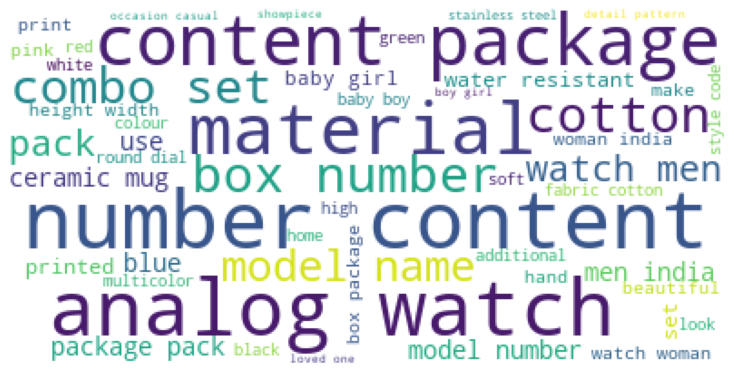

In [372]:
# Create wordcloud of description_bow_lem for entire dataset
from PIL import Image
text = data['description_bow_lem'].sum()
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(text)
fig = plt.figure(1, figsize=(13, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [377]:
from collections import Counter
# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')
# and count the words
word_counts = Counter(word_list)

In [379]:
word_counts

Counter({'key': 11,
         'elegance': 6,
         'polyester': 28,
         'multicolor': 87,
         'abstract': 44,
         'eyelet': 19,
         'door': 18,
         'curtain': 21,
         'floral': 39,
         'height': 86,
         'pack': 170,
         'enhances': 6,
         'look': 63,
         'interior': 9,
         'high': 63,
         'fabric': 114,
         'style': 83,
         'stitch': 2,
         'metal': 13,
         'ring': 5,
         'make': 60,
         'room': 32,
         'environment': 4,
         'romantic': 1,
         'loving': 1,
         'ant': 3,
         'wrinkle': 2,
         'anti': 9,
         'shrinkage': 3,
         'elegant': 29,
         'apparance': 1,
         'give': 72,
         'home': 73,
         'bright': 9,
         'modernistic': 1,
         'appeal': 7,
         'design': 147,
         'surreal': 1,
         'attention': 4,
         'sure': 22,
         'steal': 1,
         'heart': 3,
         'contemporary': 12,
         'vala

In [378]:
for w in word_counts.most_common(20):
    print(f"{w[0]}:  \t{w[1]} ")

box:  	217 
number:  	216 
material:  	179 
pack:  	170 
package:  	168 
india:  	162 
set:  	159 
watch:  	153 
model:  	149 
design:  	147 
content:  	145 
analog:  	131 
cotton:  	125 
fabric:  	114 
detail:  	112 
pattern:  	106 
water:  	99 
name:  	96 
care:  	96 
combo:  	96 


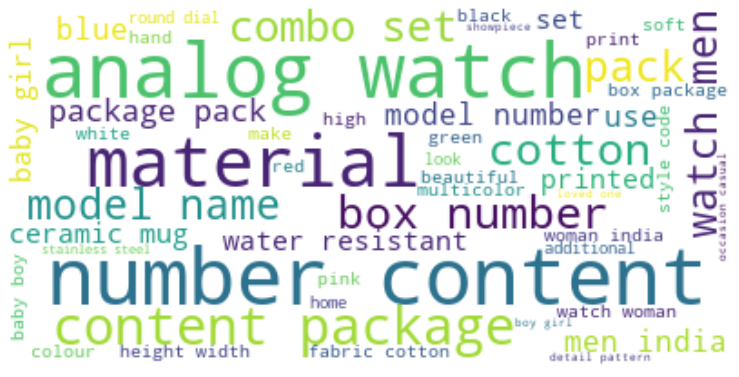

In [373]:
# Create wordcloud of description_bow_lem for entire dataset
from PIL import Image
text = data['description_bow_lem'].sum()
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(text)
fig = plt.figure(1, figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

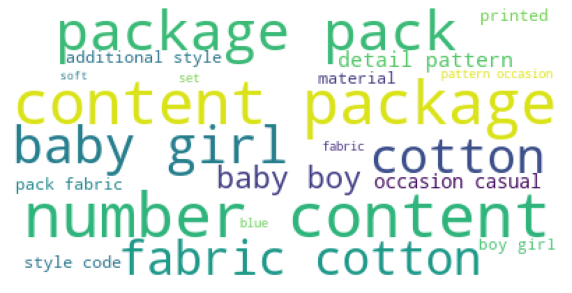

In [359]:
# Create wordcloud of description_bow_lem for data_baby
text_baby = data_baby['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_baby)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

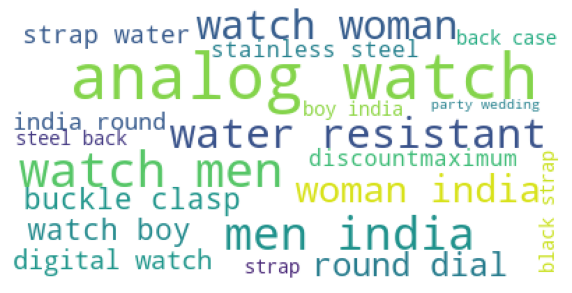

In [361]:
# Create wordcloud of description_bow_lem for data_watches
text_watches = data_watches['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_watches)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

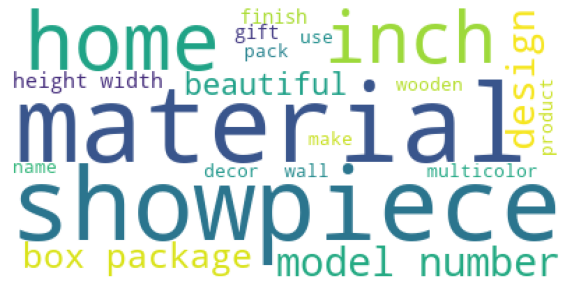

In [362]:
# Create wordcloud of description_bow_lem for data_home_decor
text_home_decor = data_home_decor['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_home_decor)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

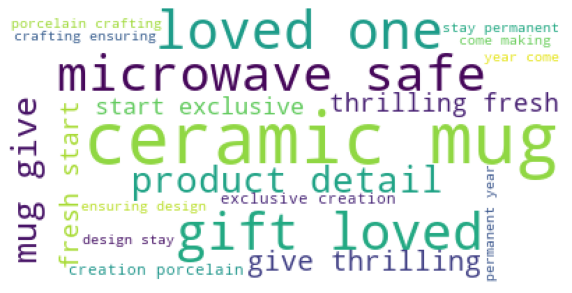

In [366]:
# Create wordcloud of description_bow_lem for data_kitchen
text_kitchen = data_kitchen['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_kitchen)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

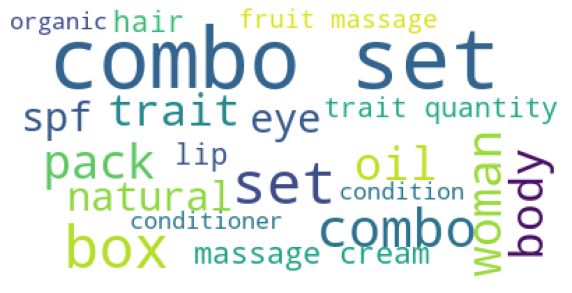

In [367]:
# Create wordcloud of description_bow_lem for data_beauty
text_beauty = data_beauty['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_beauty)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

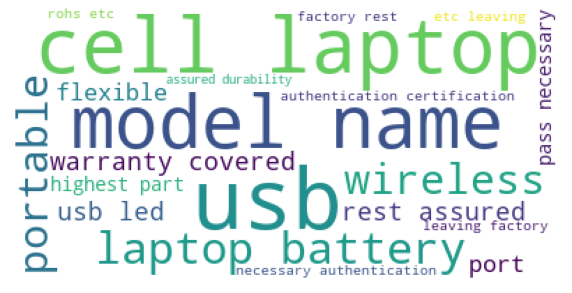

In [368]:
# Create wordcloud of description_bow_lem for data_computers
text_computers = data_computers['description_bow_lem'].sum()
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text_computers)
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [258]:
# Count words in column 'description_bow'
data['description_bow'] = data['description_bow'].astype(str)
import collections, re
dict = pd.Series([y for x in data['description_bow'].values.flatten() for y in x.split()]).value_counts().to_dict()
dict

{'free': 595,
 'products': 588,
 'buy': 576,
 'delivery': 566,
 'genuine': 564,
 'shipping': 564,
 'cash': 564,
 'day': 506,
 'replacement': 489,
 'guarantee': 470,
 'flipkart': 392,
 'online': 389,
 'com': 385,
 'price': 342,
 'specifications': 329,
 'general': 284,
 'features': 264,
 'box': 250,
 'type': 225,
 'package': 218,
 'number': 218,
 'sales': 218,
 'color': 217,
 'best': 214,
 'pack': 207,
 'brand': 207,
 'prices': 205,
 'material': 205,
 'key': 201,
 'great': 166,
 'india': 162,
 'set': 160,
 'watch': 153,
 'model': 149,
 'dimensions': 146,
 'ideal': 144,
 'contents': 142,
 'discounts': 134,
 'design': 134,
 'analog': 131,
 'cotton': 128,
 'made': 127,
 'fabric': 116,
 'details': 111,
 'size': 107,
 'quality': 106,
 'pattern': 104,
 'showpiece': 102,
 'water': 100,
 'baby': 98,
 'care': 98,
 'width': 98,
 'name': 97,
 'combo': 96,
 'height': 88,
 'men': 88,
 'product': 88,
 'multicolor': 87,
 'weight': 85,
 'additional': 84,
 'style': 83,
 'ceramic': 82,
 'home': 81,
 'roun

In [259]:
# fonction to create a list of words that have values > v
def find_words(v):
    data['description_bow'] = data['description_bow'].astype(str)
    dict = pd.Series([y for x in data['description_bow'].values.flatten() 
                      for y in x.split()]).value_counts().to_dict()
    list_w = []
    for k, val in dict.items(): 
        if val > v:
            list_w.append(k)
    return list_w

In [260]:
# List of useless and frequent words (more than 250 appearances) in 'description_bow' column
list_w = find_words(250)

In [261]:
# List of useless and frequent words in 'description' column
list_sw = ['only', 'products', 'free', 'for', 'buy', 'delivery', 
           'cash', 'shipping', 'genuine', 'replacement', 'day', 
           'flipkart', 'com', 'guarantee', 'online', 'features', 
           'specifications', 'the', 'price', 'color', 'type', 
           'general', 'sales', 'quality', 'best', 'brand', 
           'prices', 'this', 'made', 'great', 'perfect', 'size', 
           'dimensions', 'ideal', 'and', 'with', 'also', 'yes', 
           'these', 'you', 'our', 'all', 'please', 'your', 'well', 
           'each', 'yet']

In [262]:
# Extending list_w with list_sw
list_w.extend(list_sw)

# Extending stopword list 'stop_w' with list_w
stop_w.extend(list_w)

In [263]:
# Updating fonctions
def stop_word_filter_fct(list_words) :
    # First filter : delete words in stop_w
    filtered_w = [w for w in list_words if not w in stop_w]
    # Second filter : delete words of 1 or 2 caracters
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(sw)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(lem_w)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [264]:
# Create two new columns by applying transform_bow_fct and transform_bow_lem_fct
# with the extended stopwords list
data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data.shape

(1050, 11)

In [265]:
data

,uniq_id,product_name,product_category_tree,image,description,first_category,second_category,third_category,description_bow,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",Home Furnishing,Home Furnishing >> Curtains & Accessories,Home Furnishing >> Curtains & Accessories >> Curtains,key elegance polyester multicolor abstract eyelet door curtain floral height pack enhances look interiors high fabric style stitch metal ring makes room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure ste...,key elegance polyester multicolor abstract eyelet door curtain floral height pack enhances look interior high fabric style stitch metal ring make room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal ...,"key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors . this curtain is made from 100 % high quality ..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels,sathiyas cotton bath towel red yellow blue machine washable material design self gsm model name men women boys girls asvtwl mediam length inch width box number contents package,sathiyas cotton bath towel red yellow blue machine washable material design self gsm model name men woman boy girl asvtwl mediam length inch width box number content package,"specifications of sathiyas cotton bath towel ( 3 bath towel , red , yellow , blue ) bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men , women , boys , girls model id asvtw..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",Baby Care,Baby Care >> Baby Bath & Skin,Baby Care >> Baby Bath & Skin >> Baby Bath Towels,key eurospa cotton terry face towel set small height inch gsm piece assorted brings exclusively designed soft towels export texture takes care skin gives enriched feeling deserve exporting bath lot renowned brands last years famous fine prints absorbency softness durability note product suscepti...,key eurospa cotton terry face towel set small heig

In [266]:
# Count words in the new column 'description_bow'
data['description_bow'] = data['description_bow'].astype(str)
import collections, re
dict = pd.Series([y for x in data['description_bow'].values.flatten() for y in x.split()]).value_counts().to_dict()
dict

{'box': 250,
 'number': 218,
 'package': 218,
 'pack': 207,
 'material': 205,
 'key': 201,
 'india': 162,
 'set': 160,
 'watch': 153,
 'model': 149,
 'contents': 142,
 'design': 134,
 'discounts': 134,
 'analog': 131,
 'cotton': 128,
 'fabric': 116,
 'details': 111,
 'pattern': 104,
 'showpiece': 102,
 'water': 100,
 'care': 98,
 'width': 98,
 'baby': 98,
 'name': 97,
 'combo': 96,
 'height': 88,
 'men': 88,
 'product': 88,
 'multicolor': 87,
 'weight': 85,
 'additional': 84,
 'style': 83,
 'ceramic': 82,
 'home': 81,
 'round': 79,
 'women': 78,
 'wash': 78,
 'gift': 77,
 'use': 75,
 'mug': 75,
 'resistant': 73,
 'black': 73,
 'length': 70,
 'printed': 69,
 'dial': 67,
 'strap': 67,
 'body': 67,
 'inch': 67,
 'high': 64,
 'blue': 62,
 'code': 60,
 'warranty': 60,
 'casual': 59,
 'occasion': 59,
 'girl': 55,
 'designed': 54,
 'depth': 54,
 'boys': 54,
 'give': 53,
 'cover': 53,
 'easy': 53,
 'girls': 52,
 'safe': 50,
 'soft': 49,
 'laptop': 49,
 'light': 49,
 'like': 48,
 'single': 48,


In [267]:
# Count words in the new column 'description_bow_lem'
data['description_bow_lem'] = data['description_bow_lem'].astype(str)
import collections, re
dict = pd.Series([y for x in data['description_bow_lem'].values.flatten() for y in x.split()]).value_counts().to_dict()
dict

{'box': 251,
 'number': 218,
 'package': 218,
 'pack': 207,
 'material': 206,
 'key': 202,
 'india': 162,
 'set': 161,
 'watch': 153,
 'design': 149,
 'model': 149,
 'content': 146,
 'discount': 134,
 'analog': 131,
 'cotton': 128,
 'fabric': 116,
 'detail': 112,
 'pattern': 106,
 'showpiece': 103,
 'water': 100,
 'care': 98,
 'name': 98,
 'baby': 98,
 'width': 98,
 'combo': 96,
 'girl': 96,
 'gift': 95,
 'boy': 88,
 'height': 88,
 'product': 88,
 'men': 88,
 'multicolor': 87,
 'inch': 85,
 'weight': 85,
 'additional': 84,
 'style': 83,
 'ceramic': 82,
 'home': 81,
 'round': 79,
 'woman': 79,
 'wash': 78,
 'mug': 75,
 'use': 75,
 'give': 73,
 'resistant': 73,
 'black': 73,
 'one': 72,
 'length': 70,
 'body': 69,
 'printed': 69,
 'strap': 69,
 'dial': 67,
 'look': 64,
 'high': 64,
 'occasion': 62,
 'blue': 62,
 'warranty': 61,
 'make': 60,
 'code': 60,
 'casual': 59,
 'come': 56,
 'light': 56,
 'cover': 56,
 'designed': 54,
 'depth': 54,
 'print': 54,
 'easy': 53,
 'laptop': 52,
 'safe'

# Bag of word - CountVectorizer

In [268]:
# Create labels for first_category
l_cat = list(set(data['first_category']))
print("catégories : ", l_cat)
y_cat_num = [(6-l_cat.index(data.iloc[i]['first_category'])) for i in range(len(data))]

catégories :  ['Watches', 'Beauty and Personal Care', 'Computers', 'Baby Care', 'Kitchen & Dining', 'Home Furnishing', 'Home Decor & Festive Needs']


In [269]:
y_cat_num

[1,
 3,
 3,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 3,
 1,
 3,
 5,
 2,
 2,
 2,
 4,
 2,
 5,
 2,
 4,
 2,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 5,
 5,
 1,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 2,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 0,
 3,
 2,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 3,
 4,
 0,
 5,
 5,
 5,
 5,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,


In [270]:
# create bag of words (CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

In [271]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, perplexity) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=2000,
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [272]:
# Execute countvectorizer model with perplexity = 30
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, 30)

CountVectorizer : 
-----------------
ARI :  0.3267 time :  8.0


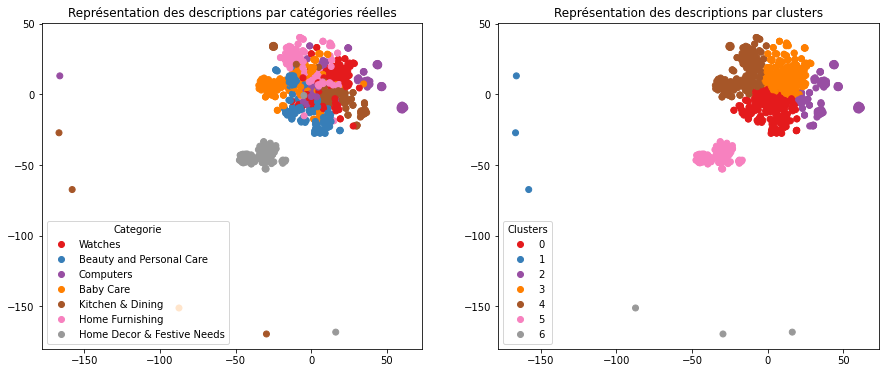

ARI :  0.3267


In [273]:
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [274]:
# Execute countvectorizer model with perplexity = 50
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, 50)

CountVectorizer : 
-----------------
ARI :  0.3524 time :  10.0


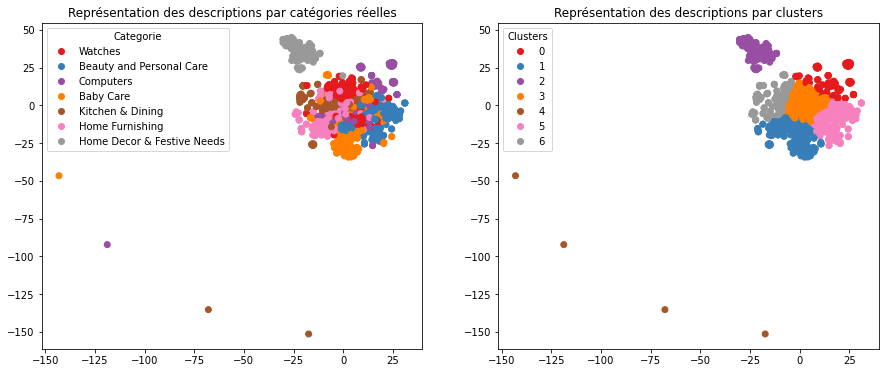

ARI :  0.3524


In [275]:
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [276]:
# Execute countvectorizer model with perplexity = 10
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, 10)

CountVectorizer : 
-----------------
ARI :  0.3419 time :  6.0


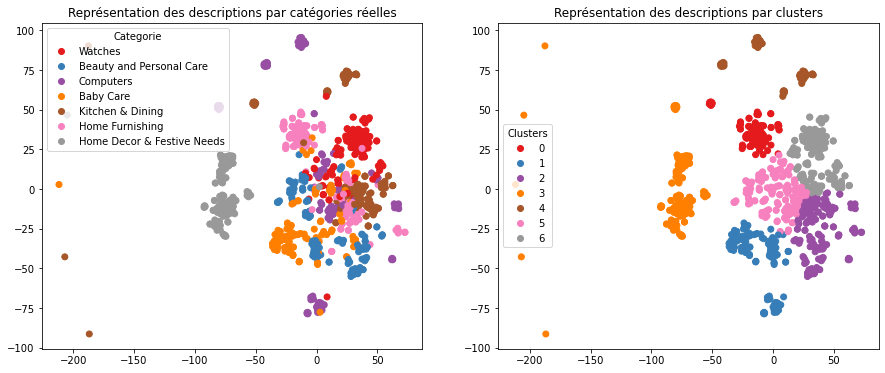

ARI :  0.3419


In [277]:
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [278]:
# Execute countvectorizer model with perplexity = 20
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, 20)

CountVectorizer : 
-----------------
ARI :  0.3722 time :  7.0


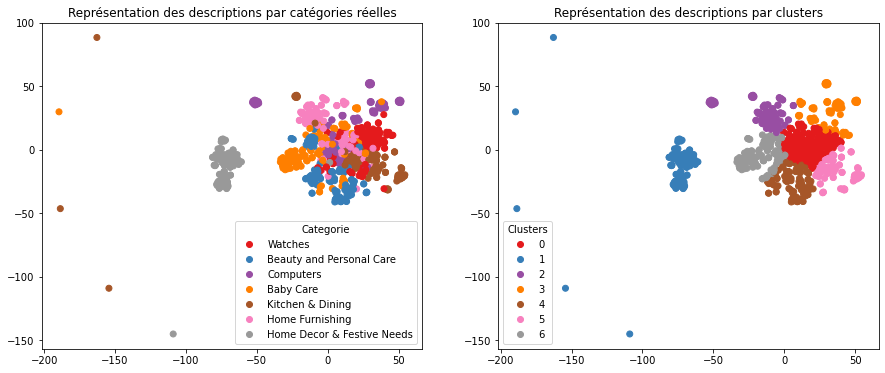

ARI :  0.3722


In [279]:
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [280]:
# Execute countvectorizer model with perplexity = 15
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, 15)

CountVectorizer : 
-----------------
ARI :  0.3448 time :  6.0


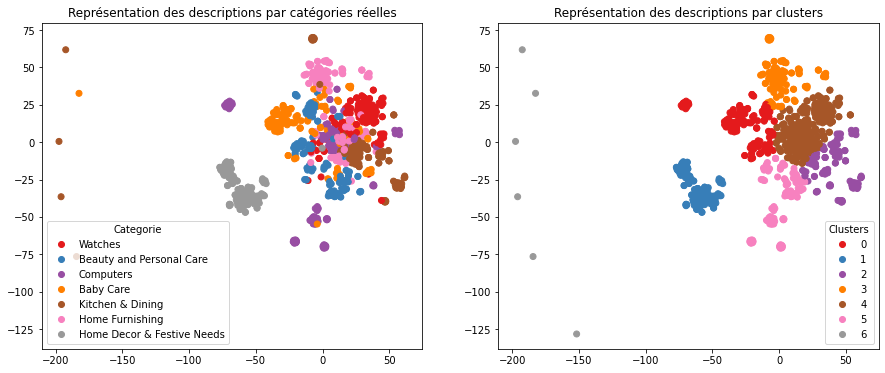

ARI :  0.3448


In [281]:
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Bag of word - Tf-idf

In [282]:
# create bag of words (Tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

In [283]:
# Execute TfidfVectorizer model with perplexity = 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, 5)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 10)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 15)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 20)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 25)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 30)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 35)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 40)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 45)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 50)

Tf-idf : 
--------
ARI :  0.4291 time :  5.0
ARI :  0.4924 time :  5.0
ARI :  0.5273 time :  6.0
ARI :  0.5524 time :  6.0
ARI :  0.4791 time :  6.0
ARI :  0.4604 time :  8.0
ARI :  0.4308 time :  8.0
ARI :  0.4427 time :  8.0
ARI :  0.4358 time :  8.0
ARI :  0.4684 time :  8.0


In [284]:
# Execute TfidfVectorizer model with perplexity between 15 and 25
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, 16)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 17)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 18)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 19)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 20)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 21)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 22)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 23)
ARI, X_tsne, labels = ARI_fct(ctf_transform, 24)

Tf-idf : 
--------
ARI :  0.5397 time :  5.0
ARI :  0.5324 time :  5.0
ARI :  0.5544 time :  6.0
ARI :  0.5899 time :  6.0
ARI :  0.5524 time :  6.0
ARI :  0.5792 time :  6.0
ARI :  0.5779 time :  7.0
ARI :  0.5089 time :  8.0
ARI :  0.5586 time :  7.0


Tf-idf : 
--------
ARI :  0.5899 time :  7.0


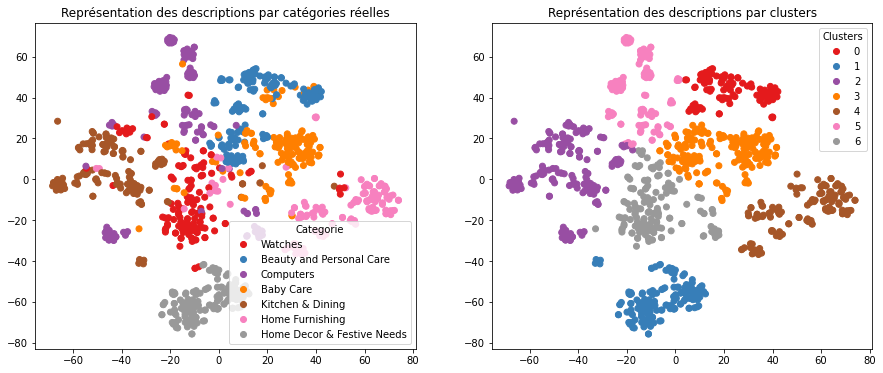

ARI :  0.5899


In [285]:
# Execute TfidfVectorizer model with perplexity = 19
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, 19)
# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## Word2Vec

In [286]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Create Word2Vec model

In [287]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['length_bow_lem'] = data['description_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", data['length_bow_lem'].max())

max length bow lem :  181


In [288]:
w2v_size=1000
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 185 # adapt to length of sentences
descriptions = data['description_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [289]:
descriptions

[['key',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'height',
  'pack',
  'enhances',
  'look',
  'interior',
  'high',
  'fabric',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'valance',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'whole',
  'world',
  'close',
  'evening',
  'create',
  'special',
  'moment',
  'joyous',
  'beauty',
  'given',
  'soothing',
  'print',
  'bring',
  'softly',
  'filter',
  'light',
  'get',
  'right',
  'amount',
  'sunlight',
  'designed',
  'model',
  'name',
  'set',
  'duster',
  'length',
  'box',
  '

In [290]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, 
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=1)
                                    # workers=multiprocessing.cpu_count())
w2v_model.build_vocab(descriptions)
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4607
Word2Vec trained


In [291]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_descriptions = pad_sequences(tokenizer.texts_to_sequences(descriptions),
                               maxlen=maxlen,
                               padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4608


## Création de la matrice d'embedding

In [292]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4608, 1000)


## Création du modèle d'embedding

In [293]:
# Création du modèle

input=Input(shape=(len(x_descriptions),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 185)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 185, 1000)         4608000   
                                                                 
 global_average_pooling1d_4   (None, 1000)             0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 4,608,000
Trainable params: 4,608,000
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [294]:
embeddings = embed_model.predict(x_descriptions)
embeddings.shape

(1050, 1000)

In [295]:
# Execute Word2Vec embedding model with perplexity between 5 and 50
print("Word2Vec embedding : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(embeddings, 5)
ARI, X_tsne, labels = ARI_fct(embeddings, 10)
ARI, X_tsne, labels = ARI_fct(embeddings, 15)
ARI, X_tsne, labels = ARI_fct(embeddings, 20)
ARI, X_tsne, labels = ARI_fct(embeddings, 25)
ARI, X_tsne, labels = ARI_fct(embeddings, 30)
ARI, X_tsne, labels = ARI_fct(embeddings, 35)
ARI, X_tsne, labels = ARI_fct(embeddings, 40)
ARI, X_tsne, labels = ARI_fct(embeddings, 45)
ARI, X_tsne, labels = ARI_fct(embeddings, 50)

Word2Vec embedding : 
--------
ARI :  0.2721 time :  5.0
ARI :  0.3499 time :  5.0
ARI :  0.3969 time :  5.0
ARI :  0.3688 time :  6.0
ARI :  0.4302 time :  6.0
ARI :  0.3372 time :  5.0
ARI :  0.3502 time :  7.0
ARI :  0.3962 time :  7.0
ARI :  0.3913 time :  9.0
ARI :  0.3647 time :  7.0


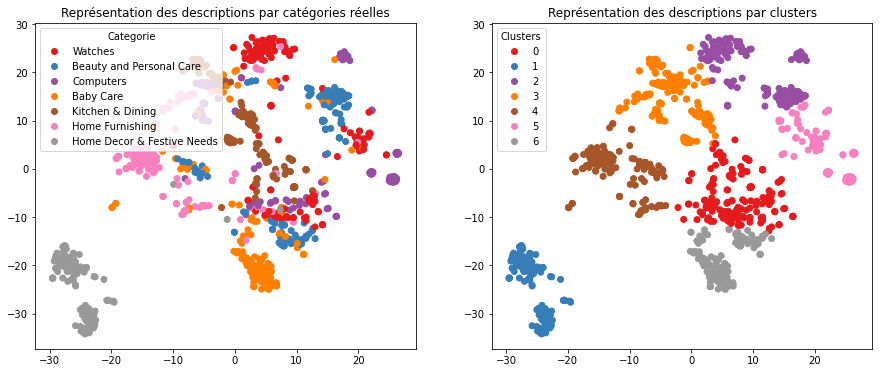

ARI :  0.3647


In [296]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Word2Vec embedding : 
--------
ARI :  0.4302 time :  6.0


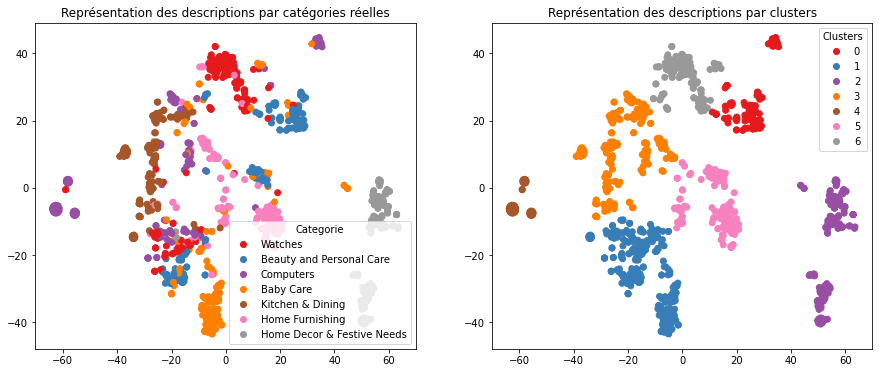

ARI :  0.4302


In [297]:
# Execute Word2Vec embedding model with perplexity between 5 and 50
print("Word2Vec embedding : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(embeddings, 25)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [298]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers

os.environ["TF_KERAS"]='1'

In [299]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  0
True


In [316]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step == 0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

In [317]:
data['length_dl'] = data['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data['length_dl'].max())

max length dl :  636


### 'bert-base-uncased'

In [330]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data['description_dl'].to_list()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [331]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  76.0


In [332]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.3532 time :  5.0
ARI :  0.3347 time :  5.0
ARI :  0.3465 time :  5.0
ARI :  0.3726 time :  6.0
ARI :  0.3305 time :  6.0
ARI :  0.3178 time :  6.0
ARI :  0.3271 time :  7.0
ARI :  0.3223 time :  7.0
ARI :  0.3175 time :  8.0
ARI :  0.3174 time :  8.0


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment

In [333]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data['description_dl'].to_list()

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmppyaxuwmb


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json in cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "b

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/tf_model.h5 in cache at C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
loading weights file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/tf_model.h5 from cache at C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRoberta

In [335]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "laye

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json in cache at C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmpj10gz5jm


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt in cache at C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmpz95l18au


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json in cache at C:\Users\33624/.cache\huggingface\transformers\5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json from cache at C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt from cache at C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3

temps traitement :  76.0


In [336]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.1905 time :  5.0
ARI :  0.1478 time :  5.0
ARI :  0.1494 time :  5.0
ARI :  0.2215 time :  5.0
ARI :  0.224 time :  6.0
ARI :  0.2191 time :  6.0
ARI :  0.224 time :  6.0
ARI :  0.2219 time :  7.0
ARI :  0.2181 time :  7.0
ARI :  0.2193 time :  7.0


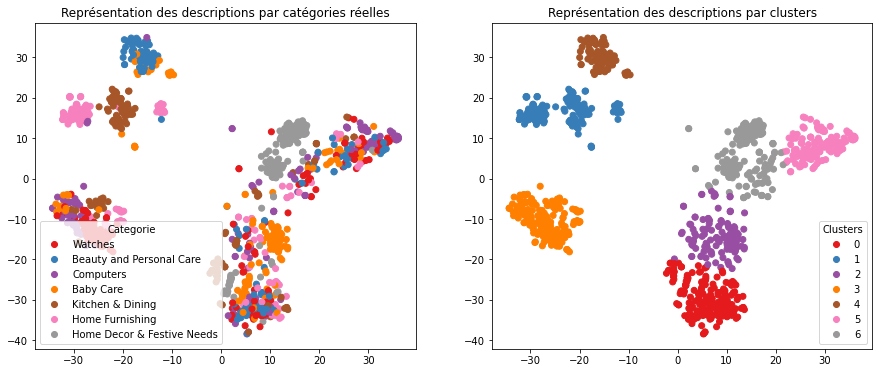

ARI :  0.2193


In [337]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [322]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [324]:
descriptions = data['description_dl'].to_list()

In [327]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  73.0


In [328]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.3158 time :  5.0
ARI :  0.3463 time :  5.0
ARI :  0.3605 time :  5.0
ARI :  0.3631 time :  6.0
ARI :  0.3257 time :  6.0
ARI :  0.313 time :  6.0
ARI :  0.3219 time :  7.0
ARI :  0.3174 time :  7.0
ARI :  0.32 time :  7.0
ARI :  0.3228 time :  8.0


ARI :  0.3631 time :  5.0


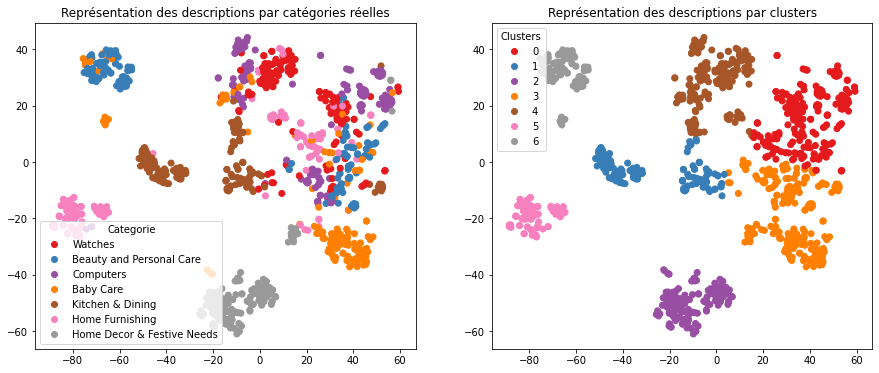

ARI :  0.3631


In [329]:
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [308]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [309]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [310]:
batch_size = 10
descriptions = data['description_dl'].to_list()

In [311]:
features_USE = feature_USE_fct(descriptions, batch_size)

In [313]:
ARI, X_tsne, labels = ARI_fct(features_USE, 10)
ARI, X_tsne, labels = ARI_fct(features_USE, 20)
ARI, X_tsne, labels = ARI_fct(features_USE, 30)
ARI, X_tsne, labels = ARI_fct(features_USE, 40)
ARI, X_tsne, labels = ARI_fct(features_USE, 50)

ARI :  0.3464 time :  5.0
ARI :  0.4433 time :  5.0
ARI :  0.429 time :  6.0
ARI :  0.415 time :  7.0
ARI :  0.4183 time :  8.0


In [314]:
ARI, X_tsne, labels = ARI_fct(features_USE, 10)
ARI, X_tsne, labels = ARI_fct(features_USE, 15)
ARI, X_tsne, labels = ARI_fct(features_USE, 20)
ARI, X_tsne, labels = ARI_fct(features_USE, 25)
ARI, X_tsne, labels = ARI_fct(features_USE, 30)
ARI, X_tsne, labels = ARI_fct(features_USE, 35)
ARI, X_tsne, labels = ARI_fct(features_USE, 40)
ARI, X_tsne, labels = ARI_fct(features_USE, 45)
ARI, X_tsne, labels = ARI_fct(features_USE, 50)

ARI :  0.3464 time :  5.0
ARI :  0.4335 time :  5.0
ARI :  0.4433 time :  5.0
ARI :  0.4476 time :  6.0
ARI :  0.429 time :  7.0
ARI :  0.4206 time :  7.0
ARI :  0.415 time :  7.0
ARI :  0.421 time :  8.0
ARI :  0.4183 time :  8.0


ARI :  0.4476 time :  5.0


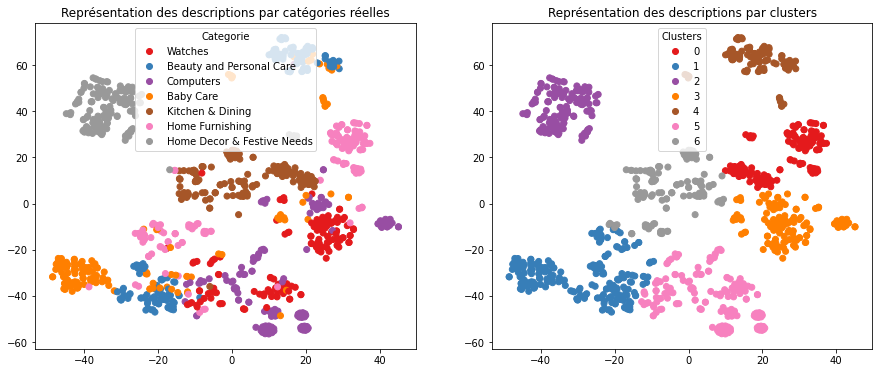

ARI :  0.4476


In [315]:
ARI, X_tsne, labels = ARI_fct(features_USE, 25)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)